<h1 align='center'>Exercício 4	– Curvas de Dispersão Sintéticas (GGF2013) </h1>

<h4 aling='justify'>O	  objetivo	  deste	  exercício	  é	  aprender	  a	 calcular	  curvas	  de	  dispersão	  sintéticas	  através	  dos	  aplicativo	  “dosrf”.	  Este	  é	  um	  código	  em	  FORTRAN	  que	  resolve	  a	  equação	  de	 dispersão	  para	  um	   meio	   em	   camadas,	   isotrópico	   e	   elástico.	   O	   aplicativo	   calcula	   velocidades	   de	   phase	   e	  grupo	  para	  o	  modo	  fundamental	  das	  ondas	  Love	 e	  Rayleigh.	
  </h4>

<h3 align="center">  Importando os modolos utilizados:</h3> 

In [1]:
import numpy as np
import obspy as op
import os
import matplotlib.pyplot as mpl
import matplotlib.gridspec as gridspec
import linecache
%matplotlib inline

In [2]:
os.chdir('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas')

<h2 aling='justify'>1. Calcular	  as curvas de dispersão para o	modelo de velocidade indicado	  abaixo. Considere períodos entre 5 e 60 s, a	   intervalos  de	   5  s.	   Faça	   um	   gráfico	com as 4 curvas	   de	  dispersão	 geradas	  e	  discuta	  as	  semelhanças	  e	 diferenças	  entre	  elas. 	 </h2>

<h4>Criando o modelo de velocidade</h4>

<h4>Criando e salvando um arquivo txt com as características do modelo pedido para inserir no programa 'icmod'</h4>

In [3]:
model_40km = ['5', '1', '1','6.5 20','6.5 20','8.1 0','y','model_40.tjo','modelo número 1']

In [4]:
np.savetxt('model_40_carac.txt',model_40km,fmt='%s')

<h4>Criando o modelo com o programa 'icmod'</h4>

In [5]:
os.system('icmod < model_40_carac.txt')

0

<h4>Lendo as informações de velocidade do modelo gerado pelo programa 'icmod'</h4>

In [6]:
vp_model_1 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas/model_40.tjo', skip_header=1)[:,1]
vp_model_1 = np.append(vp_model_1[0],vp_model_1)
H_model_1 = [0,20,40,60]

<h4>Plotando o modelo gerado pelo programa 'icmod'</h4>

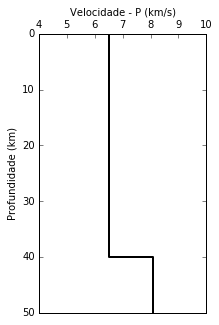

In [8]:
mpl.figure(figsize = (10,5))

ax2 = mpl.subplot()

ax2.step(vp_model_1,H_model_1,'k',lw=2,where='post')
ax2.set_xlabel('Velocidade - P (km/s)')
ax2.set_ylabel('Profundidade (km)')
ax2.xaxis.tick_top()
ax2.set_xlim([4,10])
ax2.set_ylim([50,0])
ax2.xaxis.set_label_position('top') 
ax2.set_aspect(0.2)

<h3>Calculando as curvas de dispersão para o modelo acima</h3>

<h4>Criando e salvando um arquivo txt com a Lista de períodos</h4>

In [9]:
periods = np.arange(5,65,5)

In [10]:
np.savetxt('list',periods,fmt='%0.0f')

<h4>Calculando as curvas de dispersão  através do programa 'dosrf'</h4>

In [11]:
os.system('dosrf model_40.tjo < list')

0

<h4>Renomeando os arquivos gerados pelo do programa 'dosrf'</h4>

In [12]:
dosrf_name = ['clove', 'ulove', 'crayl', 'urayl']
for i,j in enumerate(dosrf_name):
    os.rename(j+'.sac',j+'_model_40.sac')

<h4>Convertend os arquivos gerados pelo do programa 'dosrf' para um array XY</h4>

In [13]:
for i,j in enumerate(dosrf_name):
    os.system('sac2xy 2 '+j+'_model_40.sac > '+j+'_model_40.txt')

<h4>Plotando as Curvas de Dispersão geradas pelo programa 'dosrf'</h4>

In [14]:
disp_curves = []
periods = []
for i in dosrf_name:
    periods.append((np.genfromtxt(i+'_model_40.txt'))[:,0])
    disp_curves.append((np.genfromtxt(i+'_model_40.txt'))[:,1])

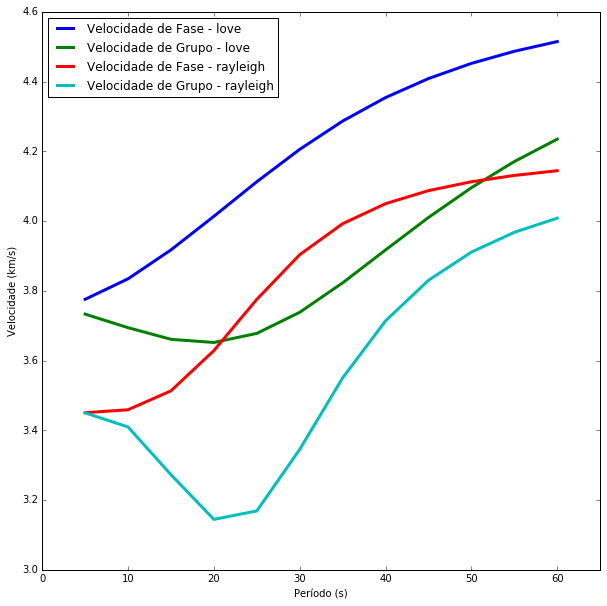

In [15]:
dosrf_label = ['Velocidade de Fase - love', 'Velocidade de Grupo - love', 'Velocidade de Fase - rayleigh', 'Velocidade de Grupo - rayleigh']
mpl.figure(figsize = (10,10))
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.2, hspace=0.5)
for i,j in enumerate(disp_curves):
    ax1 = mpl.subplot(gs1[0])
    ax1.plot(periods[i],j,lw=3,label=dosrf_label[i])
    ax1.set_xlabel('Período (s)')
    ax1.set_ylabel('Velocidade (km/s)')   
    ax1.set_xlim(0,65)
    ax1.set_ylim(3,4.6)
    ax1.legend(loc=0)

<h2 aling='justify'>2. Calcular	  as	  curvas	  de	  dispersão	  para	  o	  modelo	  acima: 	</h2>  


<h3 aling='justify'>(i) mantendo	   os	   valores	   da	   velocidade	   e	  mudando	   o	   valor	   da	   espessura	  crustal   para	  H=30	  km	  e	  H	  =	  50	  km.	</h3>  
<h3 aling='justify'>(ii) Mantendo	   o	   valor	  da	   espessura	   e	   mudando	   o	   valor	   da	  velocidade	   de	   onda	   P	  na	  crosta	  para	  Vp=6,2	  km/s	  e	  6,3	  km/s.	</h3>  

   
<h3 aling='justify'>Como	  mudaram	  as	  curvas	  de	  dispersão	  com	  respeito	  aos	  resultados	  do	 item  1? 	</h3>  

<h3>Criando o modelo de velocidade</h3>

<h4>Criando e salvando um arquivo txt com as características do modelo pedido para inserir no programa 'icmod'</h4>

In [16]:
model_30 = ['5', '1', '1','6.5 15','6.5 15','8.1 0','y','model_30.tjo','modelo número 2']
model_50 = ['5', '1', '1','6.5 25','6.5 25','8.1 0','y','model_50.tjo','modelo número 3']
model_62 = ['5', '1', '1','6.2 20','6.2 20','8.1 0','y','model_62.tjo','modelo número 4']
model_63 = ['5', '1', '1','6.3 20','6.3 20','8.1 0','y','model_63.tjo','modelo número 5']

In [17]:
model = [model_30,model_50,model_62,model_63]
modeltjo = ['model_30','model_50','model_62','model_63']
for i,j in enumerate(model):
    np.savetxt(modeltjo[i]+'_carac.txt',j,fmt='%s')

<h4>Criando o modelo com o programa 'icmod'</h4>

In [18]:
for i,j in enumerate(modeltjo):
    os.system('icmod < '+j+'_carac.txt')

<h4>Lendo as informações de velocidade do modelo gerado pelo programa 'icmod'</h4>

In [19]:
vp_model_30 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas/model_30.tjo', skip_header=1)[:,1]
vp_model_30 = np.append(vp_model_30[0],vp_model_30)
vp_model_50 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas/model_50.tjo', skip_header=1)[:,1]
vp_model_50 = np.append(vp_model_50[0],vp_model_50)
vp_model_62 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas/model_62.tjo', skip_header=1)[:,1]
vp_model_62 = np.append(vp_model_62[0],vp_model_62)
vp_model_63 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas/model_63.tjo', skip_header=1)[:,1]
vp_model_63 = np.append(vp_model_63[0],vp_model_63)
H_model_30 = [0,15,30,60]
H_model_50 = [0,25,50,60]
H_model_1 = [0,20,40,60]

vp_model = [vp_model_30,vp_model_50,vp_model_62,vp_model_63]
H_model = [H_model_30,H_model_50,H_model_1,H_model_1]
model_label = ['model_30km','model_50km','model_62km/s','model_63km/s']

<h4>Plotando os modelos gerados pelo programa 'icmod'</h4>

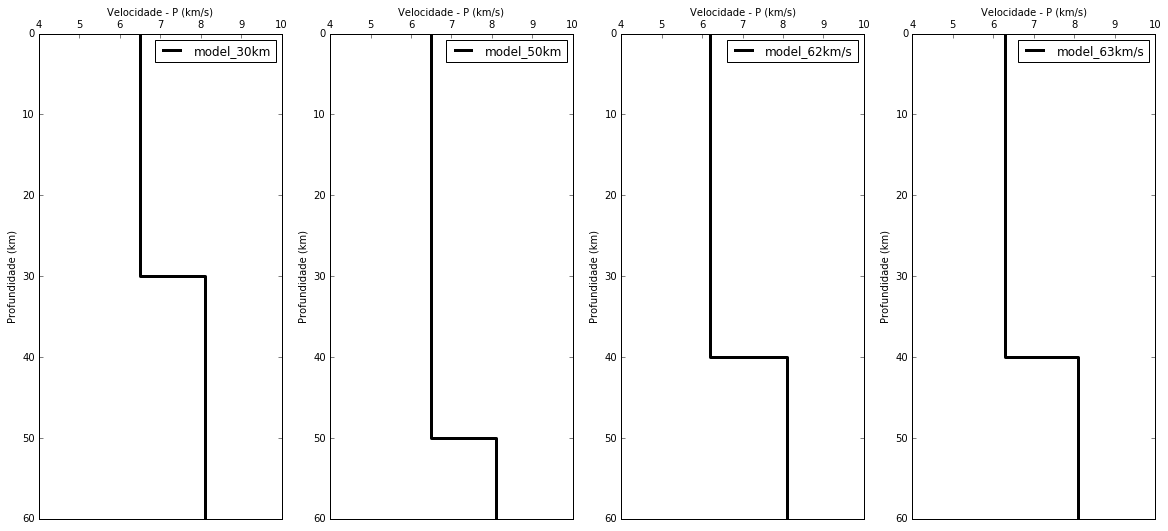

In [20]:
mpl.figure(figsize = (20,10))
gs1 = gridspec.GridSpec(1,4)
gs1.update(wspace=0.2, hspace=0.5)
for i,j in enumerate(vp_model):
    ax2 = mpl.subplot(gs1[i])
    ax2.step(j,H_model[i],'k',lw=3,label=model_label[i],where='post')
    ax2.set_xlabel('Velocidade - P (km/s)')
    ax2.set_ylabel('Profundidade (km)')
    ax2.legend(loc=0)
    ax2.xaxis.tick_top()
    ax2.set_xlim([4,10])
    ax2.set_ylim([60,0])
    ax2.xaxis.set_label_position('top') 
    ax2.set_aspect(0.2)

<h3>Calculando as curvas de dispersão para os modelos acima</h3>

<h4>Calculando e renomeando as curvas de dispersão  através do programa 'dosrf' e convertend os arquivos gerados pelo do programa 'dosrf' para um array XY</h4>

In [21]:
for l,k in enumerate(modeltjo):
    for i,j in enumerate(dosrf_name):
        os.system('dosrf '+k+'.tjo < list')
        os.rename(j+'.sac',j+'_'+k+'.sac')
        os.system('sac2xy 2 '+j+'_'+k+'.sac > '+j+'_'+k+'.txt')

<h4>Plotando as Curvas de Dispersão geradas pelos modelos</h4>

In [22]:
disp_waves = ['_model_30.txt','_model_40.txt','_model_50.txt','_model_62.txt','_model_63.txt']
clove = []
crayl = []
ulove = []
urayl = []
periods = []
for i in disp_waves:
    periods.append((np.genfromtxt('clove'+i))[:,0])
    clove.append((np.genfromtxt('clove'+i))[:,1])
    crayl.append((np.genfromtxt('crayl'+i))[:,1])
    ulove.append((np.genfromtxt('ulove'+i))[:,1])
    urayl.append((np.genfromtxt('urayl'+i))[:,1])

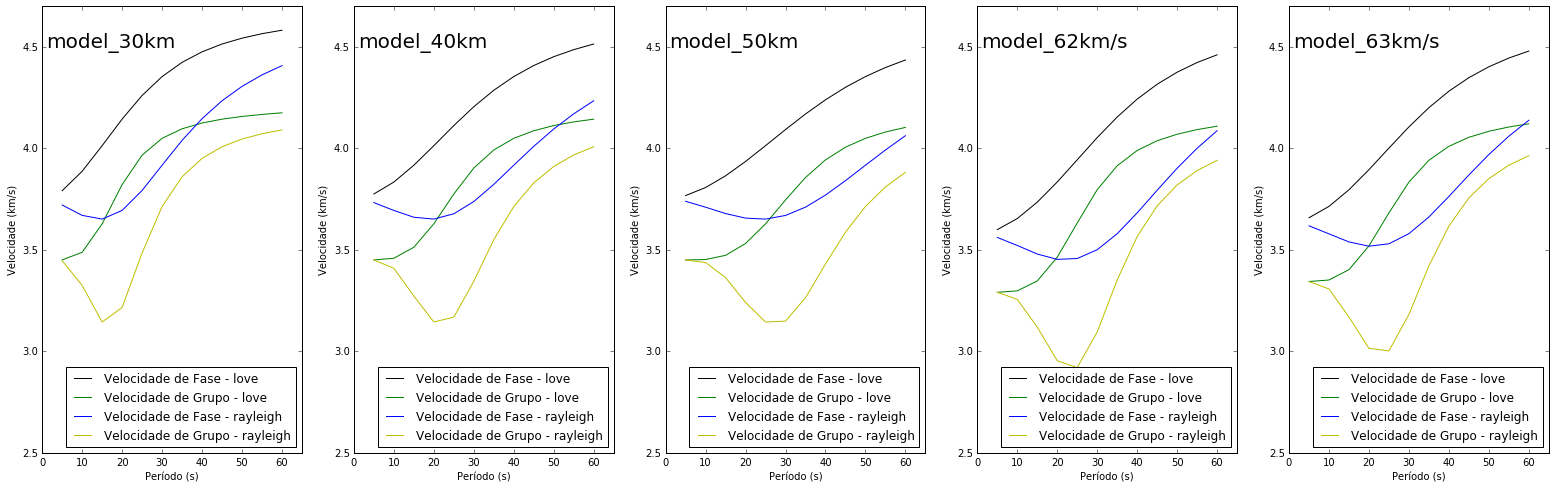

In [24]:
disp_label = ['model_30km','model_40km','model_50km','model_62km/s','model_63km/s']        
            
mpl.figure(figsize = (27,8))
gs1 = gridspec.GridSpec(1,5)
gs1.update(wspace=0.2, hspace=0.5)
for i,j in enumerate(disp_label):
    ax1 = mpl.subplot(gs1[i])
    ax1.plot(periods[i],clove[i],'k',label='Velocidade de Fase - love')
    ax1.plot(periods[i],crayl[i],'g',label='Velocidade de Grupo - love')
    ax1.plot(periods[i],ulove[i],'b',label='Velocidade de Fase - rayleigh')
    ax1.plot(periods[i],urayl[i],'y',label='Velocidade de Grupo - rayleigh')
    ax1.text(1,4.5,j, fontsize=20)
    ax1.set_xlabel('Período (s)')
    ax1.set_ylabel('Velocidade (km/s)')   
    ax1.set_xlim(0,65)
    ax1.set_ylim(2.5,4.7)
    ax1.legend(loc=4)

<h2 aling='justify'>3. Calcular	  as	  curvas	  de	  dispersão	  para	  os	  dos	  modelos	indicado  abaixo: 	  	</h2>  


<h3 aling='justify'>Compare	   as	   velocidades	   de	   dispersão	   para	   cada	   modelo	   e	  discuta	   o	   efeito	   da	   camada	  sedimentar.	  	</h3>  

<h3>Criando o modelo de velocidade</h3>

<h4>Criando e salvando um arquivo txt com as características do modelo pedido para inserir no programa 'icmod'</h4>

In [26]:
model_31= ['5', '1', '1','6.3 20','6.8 20','8.1 0','y','model_31.tjo','modelo número 1']
model_32 = ['5', '1', '1','2.5 1','6.3 20','6.8 20','8.1 0','y','model_32.tjo','modelo número 3']

In [44]:
model3 = [model_31,model_32]
modelname = ['model_31','model_32']
for i,j in enumerate(model3):
    np.savetxt(modeltjo[i]+'_carac.txt',j,fmt='%s')

<h4>Criando o modelo com o programa 'icmod'</h4>

In [45]:
for i,j in enumerate(modelname):
    os.system('icmod < '+j+'_carac.txt')

<h4>Lendo as informações de velocidade do modelo gerado pelo programa 'icmod'</h4>

In [46]:
vp_model_31 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas/model_31.tjo', skip_header=1)[:,1]
vp_model_31 = np.append(vp_model_31[0],vp_model_31)
vp_model_32 = np.genfromtxt('/home/diogo/Dropbox/UFRN/Aplicações_Sismológicas/exerc_aplicacoes_dIOGO/Curvas_Dispersão_Sintéticas/model_32.tjo', skip_header=1)[:,1]
vp_model_32 = np.append(vp_model_32[0],vp_model_32)

H_model_31 = [0,20,40,60]
H_model_32 = [0,1,21,41,60]

vp_model = [vp_model_31,vp_model_32]
H_model = [H_model_31,H_model_32]
model_label = ['model_31','model_32']

<h4>Plotando os modelos gerados pelo programa 'icmod'</h4>

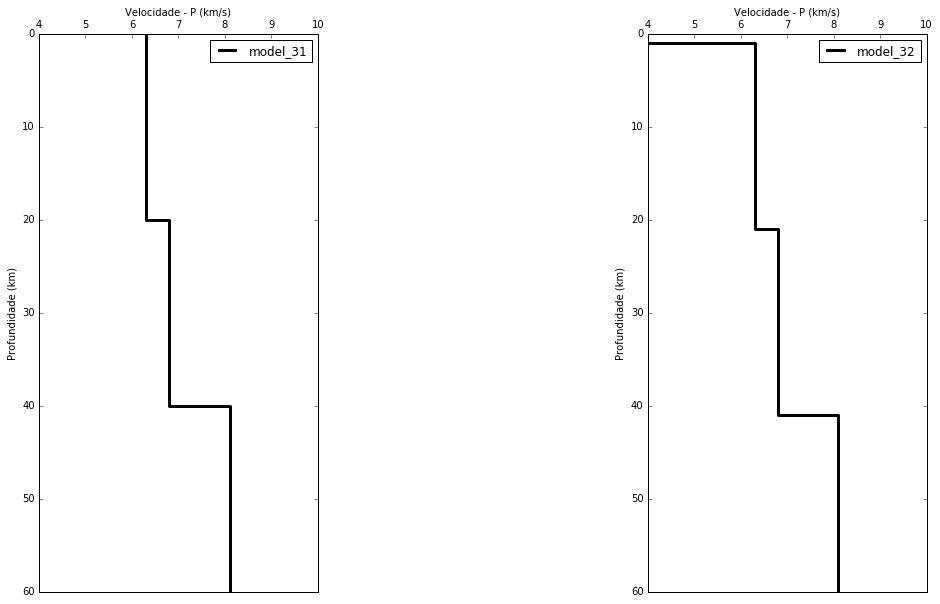

In [47]:
mpl.figure(figsize = (20,10))
gs1 = gridspec.GridSpec(1,2)
gs1.update(wspace=0.2, hspace=0.5)
for i,j in enumerate(vp_model):
    ax2 = mpl.subplot(gs1[i])
    ax2.step(j,H_model[i],'k',lw=3,label=model_label[i],where='post')
    ax2.set_xlabel('Velocidade - P (km/s)')
    ax2.set_ylabel('Profundidade (km)')
    ax2.legend(loc=0)
    ax2.xaxis.tick_top()
    ax2.set_xlim([4,10])
    ax2.set_ylim([60,0])
    ax2.xaxis.set_label_position('top') 
    ax2.set_aspect(0.2)

<h3>Calculando as curvas de dispersão para os modelos acima</h3>

<h4>Calculando e renomeando as curvas de dispersão  através do programa 'dosrf' e convertend os arquivos gerados pelo do programa 'dosrf' para um array XY</h4>

In [50]:
for l,k in enumerate(modelname):
    for i,j in enumerate(dosrf_name):
        os.system('dosrf '+k+'.tjo < list')
        os.rename(j+'.sac',j+'_'+k+'.sac')
        os.system('sac2xy 2 '+j+'_'+k+'.sac > '+j+'_'+k+'.txt')

<h4>Plotando as Curvas de Dispersão geradas pelos modelos</h4>

In [52]:
disp_waves = ['_model_31.txt','_model_32.txt']
clove = []
crayl = []
ulove = []
urayl = []
periods = []
for i in disp_waves:
    periods.append((np.genfromtxt('clove'+i))[:,0])
    clove.append((np.genfromtxt('clove'+i))[:,1])
    crayl.append((np.genfromtxt('crayl'+i))[:,1])
    ulove.append((np.genfromtxt('ulove'+i))[:,1])
    urayl.append((np.genfromtxt('urayl'+i))[:,1])

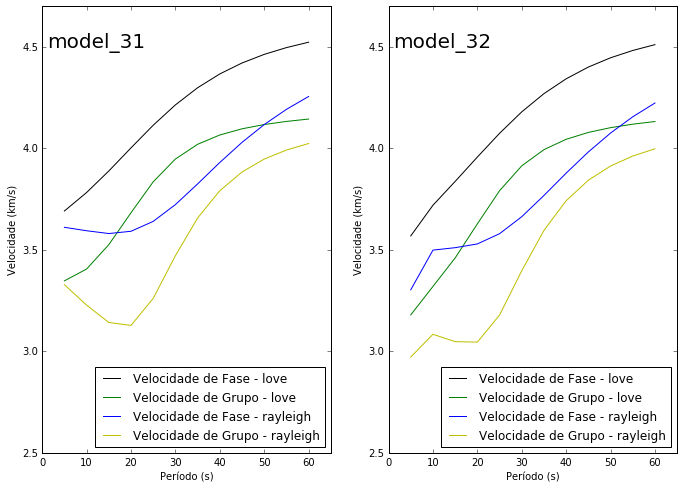

In [62]:
            
mpl.figure(figsize = (30,8))
gs1 = gridspec.GridSpec(1,5)
gs1.update(wspace=0.2, hspace=0.5)
for i,j in enumerate(model_label):
    ax1 = mpl.subplot(gs1[i])
    ax1.plot(periods[i],clove[i],'k',label='Velocidade de Fase - love')
    ax1.plot(periods[i],crayl[i],'g',label='Velocidade de Grupo - love')
    ax1.plot(periods[i],ulove[i],'b',label='Velocidade de Fase - rayleigh')
    ax1.plot(periods[i],urayl[i],'y',label='Velocidade de Grupo - rayleigh')
    ax1.text(1,4.5,j, fontsize=20)
    ax1.set_xlabel('Período (s)')
    ax1.set_ylabel('Velocidade (km/s)')   
    ax1.set_xlim(0,65)
    ax1.set_ylim(2.5,4.7)
    ax1.legend(loc=4)